# Polynomial Regression Model

change size of the test subset

## import libs

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## read data base

In [3]:
data = pd.read_csv('CLEANED_sobolsampling-2048.csv')
#print(f'{data}')
data = data.drop(data.columns[0], axis=1)
#data = data.transpose()
#print(f'{data}')

## prepare data

In [10]:
X = data.drop('density', axis=1)
#print(f'{X}')

Y = data['density']
#print(f'{Y}')
sizes = np.arange(0.05, 1.0, 0.05, dtype=float)
#print(f'{sizes}')
X_TRAINs = []
X_TESTs = []
Y_TRAINs = []
Y_TESTs = []
for size in sizes:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=size.round(2), random_state=29)
    X_TRAINs.append(X_train)
    X_TESTs.append(X_test)
    Y_TRAINs.append(Y_train)
    Y_TESTs.append(Y_test)

## create and train the models

In [13]:
MODELs = []
Y_PREDICTIONs = []
RMSEs = []
R2s = []
#print(f'{len(sizes)}')
#print(f'{len(X_TRAINs)}')
#print(f'{len(X_TESTs)}')
#print(f'{len(Y_TRAINs)}')
#print(f'{len(Y_TESTs)}')

for i in range(0, len(sizes)):
    #print(sizes[i].round(2))
    ## create and train model
    model = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())
    model.fit(X_TRAINs[i], Y_TRAINs[i])
    MODELs.append(model)

    ## create model's predictions
    Y_prediction = model.predict(X_TESTs[i])
    Y_PREDICTIONs.append(Y_prediction)

    ## evaluate
    rmse = np.sqrt(mean_squared_error(Y_TESTs[i], Y_prediction))
    r2 = r2_score(Y_TESTs[i], Y_prediction)
    RMSEs.append(rmse)
    R2s.append(r2)

    print(f'Using test_size={sizes[i].round(2)}:')
    print(f'RMSE: {rmse}')
    print(f'R2: {r2}')
    print(f'')

Using test_size=0.05:
RMSE: 6.2136879256999125
R2: 0.9969470643783853

Using test_size=0.1:
RMSE: 6.135234993536188
R2: 0.9969917392263782

Using test_size=0.15:
RMSE: 5.6309941633935585
R2: 0.9971597272727429

Using test_size=0.2:
RMSE: 6.956319670932457
R2: 0.9959507035626957

Using test_size=0.25:
RMSE: 6.683952243391971
R2: 0.996260997601836

Using test_size=0.3:
RMSE: 6.626283352510871
R2: 0.9964510894698381

Using test_size=0.35:
RMSE: 6.667653658451137
R2: 0.9964438182063127

Using test_size=0.4:
RMSE: 6.505801818625748
R2: 0.9967165099030444

Using test_size=0.45:
RMSE: 6.304812928465349
R2: 0.9968269225604197

Using test_size=0.5:
RMSE: 6.386557562761128
R2: 0.9967763352734434

Using test_size=0.55:
RMSE: 28.08668751095737
R2: 0.937227575636796

Using test_size=0.6:
RMSE: 7.212369306744954
R2: 0.995808408626812

Using test_size=0.65:
RMSE: 8.585079730280226
R2: 0.9940020473380854

Using test_size=0.7:
RMSE: 8.816157318822395
R2: 0.9937103775441695

Using test_size=0.75:
RMSE: 

## plots

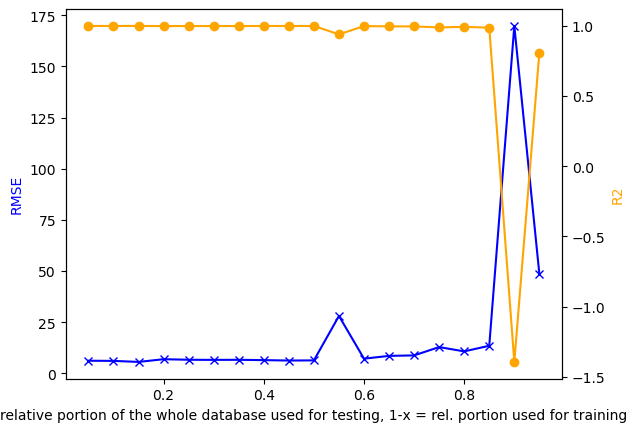

In [22]:
fig, ax1 = plt.subplots()
ax1.plot(sizes, RMSEs, '-x', color='blue', label='RMSE')
ax1.set_xlabel('relative portion of the whole database used for testing, 1-x = rel. portion used for training')
ax1.set_ylabel('RMSE', color='blue')

ax2 = ax1.twinx()
ax2.plot(sizes, R2s, '-o', color='orange', label='R2')
ax2.set_ylabel('R2', color='orange')

#plt.legend()
plt.show()